## Ch7 exercises: Nonlinear modelling

## Q6a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polyno- mial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector

%matplotlib inline

In [2]:
# importing
wage = pd.read_csv('data/Wage.csv', header = 0, na_values = 'NA')
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
# cleaning columns with a number and fullstop in front of them
wage['maritl'] = wage['maritl'].str.replace(r'^\d+\.\s', '', regex=True)
wage['race'] = wage['race'].str.replace(r'^\d+\.\s', '', regex=True)
wage['region'] = wage['region'].str.replace(r'^\d+\.\s', '', regex=True)
wage['jobclass'] = wage['jobclass'].str.replace(r'^\d+\.\s', '', regex=True)
wage['health_ins'] = wage['health_ins'].str.replace(r'^\d+\.\s', '', regex=True)
wage['education'] = wage['education'].str.replace(r'^\d+\.\s', '', regex=True) # I couldn't work out how to remove the extra symbols (e.g. <)
wage['health'] = wage['health'].str.replace(r'^\d+\.\s', '', regex=True) # same as above, couldn't work it out

In [4]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,Never Married,White,< HS Grad,Middle Atlantic,Industrial,<=Good,No,4.318063,75.043154
1,2004,24,Never Married,White,College Grad,Middle Atlantic,Information,>=Very Good,No,4.255273,70.476020
2,2003,45,Married,White,Some College,Middle Atlantic,Industrial,<=Good,Yes,4.875061,130.982177
3,2003,43,Married,Asian,College Grad,Middle Atlantic,Information,>=Very Good,Yes,5.041393,154.685293
4,2005,50,Divorced,White,HS Grad,Middle Atlantic,Information,<=Good,Yes,4.318063,75.043154


In [5]:
# defining the predictor and response
X = wage.age
y = wage.wage

In [6]:
# creating polynomial features using 'PolynomialFeatures' from the skilearn.preprocessing library 
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.values.reshape(-1, 1)) # 

In [7]:
# adding constant to X_poly
X_poly = sm.add_constant(X_poly)

In [8]:
# fitting the model
poly_model = sm.OLS(y, X_poly)
results = poly_model.fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.77e-57
Time:                        11:26:41   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

### Not answering the question though: the question wants us to do cross-validation to choose the best model. Trying again below...

First, I need to look at what X and Y look like currently in order to perform any required preprocessing to use them in a polynomial regression model. 

To perform polynomial regression using scikit-learn, we need to provide the predictor variables (X) and the response variable (y) in a specific format. Scikit-learn's models typically expect the input data to be in the form of 2D arrays or matrices.

For polynomial regression specifically, scikit-learn requires the <i><u>predictor variables X</i></u> to be a 2D array or matrix, where each row represents a data point and each column represents a feature. The <i><u>response variable y</i></u> should be a 1D array or matrix, representing the target values corresponding to each data point. To summarise:

<b>Predictor variable X:</b>

- Shape: 2D array or matrix
- Dimensions: (n_samples, n_features)
- Each row represents a sample or data point.
- Each column represents a feature or characteristic associated with the sample.
- Reason: The polynomial regression model expects the predictor variable X to be a 2D array or matrix, where each row corresponds to a data point, and each column represents a feature. This format allows the model to capture the relationships between multiple features and the response variable.

<n> 
    
<b>Response variable y:</b>

- Shape: 1D array or vector
- Dimensions: (n_samples,)
- Contains the target or outcome values corresponding to each sample in X.
- Reason: The response variable y should be a 1D array or vector to match the corresponding target values for the samples in X. In polynomial regression, the model aims to predict these target values based on the polynomial features derived from X.


In [10]:
# taking a look at what X and y look like currently... 
print(X)
print(type(X))
print(X.shape)

print(y)
print(type(y))
print(y.shape)

0       18
1       24
2       45
3       43
4       50
        ..
2995    44
2996    30
2997    27
2998    27
2999    55
Name: age, Length: 3000, dtype: int64
<class 'pandas.core.series.Series'>
(3000,)
0        75.043154
1        70.476020
2       130.982177
3       154.685293
4        75.043154
           ...    
2995    154.685293
2996     99.689464
2997     66.229408
2998     87.981033
2999     90.481913
Name: wage, Length: 3000, dtype: float64
<class 'pandas.core.series.Series'>
(3000,)


In [11]:
# X is a 2D array with dimensions (3000, 1), therefore can be left as it is for modelling 
# y is a 2D array with dimensions (3000, 1), therefore needs reshaping into a 1D array with shape (3000,)
y = np.reshape(y, (3000,))
print(y)
print(type(y))
print(y.shape)

0        75.043154
1        70.476020
2       130.982177
3       154.685293
4        75.043154
           ...    
2995    154.685293
2996     99.689464
2997     66.229408
2998     87.981033
2999     90.481913
Name: wage, Length: 3000, dtype: float64
<class 'pandas.core.series.Series'>
(3000,)


### Now that X and y appear to be in the right shapes, getting into modelling...

In [12]:
# setting up a variable with the degrees of polynomial regression to be considered
degrees = [1, 2, 3, 4]

In [13]:
# creating an empty list to store the cross-validation scores
cv_scores = []

In [14]:
# setting up a loop which creates a model for each degree, performs cross-validation, and stores results in 'cv_scores'
for degree in degrees: # for each degree in the list of degrees... 
    poly_features = PolynomialFeatures(degree=degree) # creating the polynomial features using PolynomialFeatures with the specified degree
    X_poly = poly_features.fit_transform(X) 
    # the polynomial features are then applied to the predictor variable X to obtain X_poly, a transformed version of X with polynomial terms 
    #(transforms X into a new array X_poly which includes the original features as well as polynomial terms up to the specified degree)
    model = LinearRegression() # a linear regression model is instantiated
    scores = cross_val_score(model, X_poly, y, cv=5) # cross-validation is performed using 'cross_val_score'. The X_poly and y are passed as inputs along with the number of folds (cv=5 for 5-fold cross-validation)
    cv_scores.append(np.mean(scores)) # the mean of the cross-validation scores is calculated using np.mean(scores) and appended to the cv_scores list

ValueError: Expected 2D array, got 1D array instead:
array=[18 24 45 ... 27 27 55].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# finding the optimal degree with the highest cross-validation score
optimal_degree = degrees[np.argmax(cv_scores)] # np.argmax(cv_scores) function returns the index of the degree that achieved the highest cross-validation score, then stores in 'optimal_degree'
print("Optimal Degree:", optimal_degree)

In [15]:
# now fitting the model with the optimal degree
poly_features = PolynomialFeatures(degree=optimal_degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

NameError: name 'optimal_degree' is not defined

NameError: name 'model' is not defined

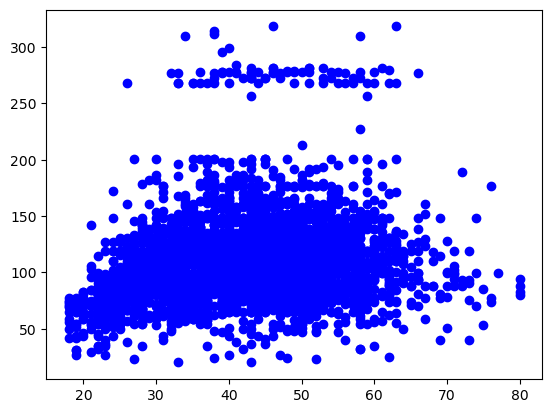

In [16]:
# plotting the resulting polynomial fit to the data 
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X_poly), color='orange', label='Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

NameError: name 'model' is not defined

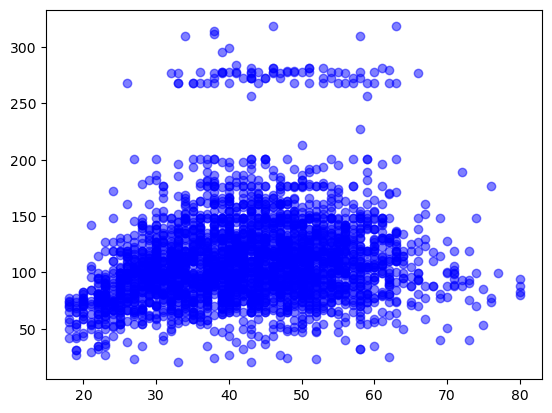

In [17]:
# playing around to see what it would look like if X and y were different colours
plt.scatter(X, y, color='blue', label='X', alpha=0.5)
plt.scatter(X, model.predict(X_poly), color='red', label='y', alpha=0.5)
plt.plot(X, model.predict(X_poly), color='green', label='Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [18]:
# quickly doing the same model selection process as above but using ANOVA
anova_results = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = sm.OLS(y, X_poly)
    fit = model.fit()
    anova_results.append(fit.fvalue)

optimal_degree = degrees[np.argmax(anova_results)] # finding the degree with the highest F-value (ANOVA statistic)
print("Optimal Degree (ANOVA):", optimal_degree) 

ValueError: Expected 2D array, got 1D array instead:
array=[18 24 45 ... 27 27 55].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### In answer to the questions in 6a: 
- What degree was chosen: 4
- How does this compare to the results of hypothesis testing using ANOVA? The ANOVA results gave me 2. Thoughts on what could account for the difference: 
    - The different metrics used (mean vs F-statistic) capture different aspects of model fit and may lead to different conclusions
    - ANOVA assumes that the errors (residuals) are normally distributed and have constant variance across different levels of the predictor variable. Cross-validation, being a resampling technique, is less sensitive to these assumptions and provides a more robust estimate of model performance.
    - ANOVA considers the variability between groups and within groups, while cross-validation considers the overall model performance on different subsets of the data


## Q6b) Fit a step function to predict wage using age, and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained

In [2]:
# defining number of cuts, going to go upto 8 to make age range bins in 10 year intervals
num_cuts = [1, 2, 3, 4, 5, 6, 7, 8]

In [3]:
# initialising an empty list to store CV scores
cv_scores = []

In [4]:
# creating a loop to fit the models with different number of step functions, test them using cv, and store results in 'cv_scores'
for cuts in num_cuts:
    cut_points = np.linspace(np.min(X), np.max(X), num=cuts+1) # generates 'cuts + 1' evenly spaced points between the minimum and maximum values of X and stores in 'cut_points'
    bins = np.digitize(X, cut_points) 
    model = LinearRegression()
    scores = cross_val_score(model, bins.reshape(-1, 1), y, cv=5)  # 5-fold cross-validation / # do i need to reshape?
    cv_scores.append(np.mean(scores))

NameError: name 'X' is not defined

####  Notes on interpretation: <code>bins = np.digitize(X, cut_points)</code>

The np.digitize() function assigns each value in X to a bin based on the cut points:
- X represents the array of ages.
- cut_points represents the cut points or bins.

The np.digitize() function maps each value in X to the corresponding bin based on its value and the provided cut points. It returns an array bins where each element represents the bin number to which the corresponding value in X belongs.

For example, if X is [18, 24, 45, 27, 27, 55] and cut_points is [20, 30, 40, 50], the resulting bins array would be [0, 0, 2, 1, 1, 3]. Here, the values [18, 24] fall into the first bin (bin 0), [45, 27] fall into the third bin (bin 2), and [27, 55] fall into the fourth bin (bin 3).

In [70]:
# finding optimal no. cuts with highest cv score
optimal_num_cuts = num_cuts[np.argmax(cv_scores)]
print("Optimal Number of Cuts:", optimal_num_cuts)

Optimal Number of Cuts: 7


In [72]:
# modelling with 7 step functions
num_bins = 7
cut_points = np.linspace(np.min(X), np.max(X), num=num_bins+1)
bins = np.digitize(X, cut_points)
model = LinearRegression()
model.fit(bins.reshape(-1, 1), y)

LinearRegression()

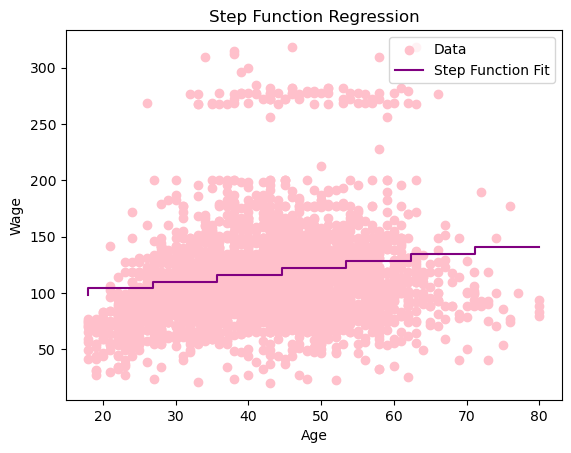

In [73]:
# plotting
plt.scatter(X, y, color='pink', label='Data')
plt.step(cut_points, model.predict(np.arange(1, num_bins+2).reshape(-1, 1)), color='purple', label='Step Function Fit')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Step Function Regression')
plt.legend()
plt.show()

### 10a)  Using the College data, split the data into a training set and a test set. Using <u>out-of-state tuition</u> as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [2]:
college = pd.read_csv('data/College.csv', header=0)
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# a bit of cleaning to rename the unnamed column since we won't use it as the response variable in this question
college.rename(columns={'Unnamed: 0': 'University'}, inplace=True)
college.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [15]:
X = college.drop(['Outstate', 'University', 'Private'], axis=1)
y = college['Outstate']

In [16]:
y.head()

0     7440
1    12280
2    11250
3    12960
4     7560
Name: Outstate, dtype: int64

In [17]:
# taking a look at what X and y look like currently... 
print(X)
print(type(X))
print(X.shape)

print(y)
print(type(y))
print(y.shape)

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  per

#### Notes on interpretation
For modeling with a Generalized Additive Model (GAM) using libraries like pygam, X should be a 2D array or DataFrame with dimensions (n_samples, n_features), and y should be a 1D array or Series with shape (n_samples,), where n_samples represents the number of data points.

In our case, X already has the appropriate shape as a DataFrame, so no reshaping is required. y is a Pandas Series which can be considered as a 1D array, so it also doesn't require reshaping.

In [18]:
# splitting into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
selected_features = [] # initialising an empty list to store the selected features
best_model = None # initialising a variable to store the best model
best_score = 0 # initialising a variable to store the best adjusted R-squared score

In [ ]:
while len(selected_features) < X.shape[1]: 
    best_feature = None 
    for feature in X.columns:
        if feature not in selected_features: 
            features = selected_features + [feature] # creating a list of selected features plus the current feature
            X_train_selected = X_train[features] # creating a new dataframe containing only the selected features from the training dat
            X_train_selected = sm.add_constant(X_train_selected)  # Add a constant term for the intercept
            model = GLM(y_train, X_train_selected, family=sm.families.Gaussian()) # initialising a GLM model with the selected features and the Gaussian family
            results = model.fit() # fitting the GLM model to the training data
            score = results.rsquared_adj # calculating the adjusted R-squared score of the model
            if score > best_score: # loop to check if the current model has a higher adjusted R-squared score than the previous best model
                best_score = score
                best_feature = feature
    if best_feature is not None: # loop to append the best feature to the list of selected features if a best feature was found
        selected_features.append(best_feature)

In [ ]:
# building final model using selected features
X_train_final = X_train[selected_features] # creating a dataframe with only the selected features from the training data
X_train_final = sm.add_constant(X_train_final)  # Add a constant term for the intercept
final_model = GLM(y_train, X_train_final, family=sm.families.Gaussian()) # initialising the final GLM model with the selected features from the Gaussain family 
final_results = final_model.fit() # fits the final GLM model to the training data 

In [ ]:
# generating some predicted values 
X_test_final = sm.add_constant(X_test[selected_features])
y_pred = final_results.predict(X_test_final)

In [ ]:
# plotting results to compare actual vs predicted results
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# summarising model performance in some statistics 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)